# KI-gestützte Bilderkennung zur automatisierten Müllklassifizierung und Trennhilfe

**Modul:** Selected Topics of AI <br>
**Professor:** Prof. Dr. Johannes Maucher <br>
**Bearbeitet von:** Lars Gerigk (lg107), Julia Ebert (je073), Joel Starkov (js486) <br>
**Abgabe:** 28.01.2026 <br>

## Inhaltsverzeichnis 

1. Problemstellung & Zielsetzung<br>

    1.1. Motivation & Problemanalyse <br>
    1.2. Ziel <br>
    1.3. Abgrenzung der Müllkategorien <br>
    
2. Installation & Setup <br>

    2.1. Installation (otional) <br>
    2.2. Imports<br>
    2.3. Globale Konfigurationen & Utils<br>
        2.3.1. Reproduzierbarkeit<br>
        2.3.2. Device-Konfiguration <br>
        2.3.3. Zentrale Hyperparameter Konfiguration <br>

10. Quellen

<br>

---

### 1. Problemstellung & Zielsetzung
#### 1.1. Motivation & Problemanalyse <a id="motivation"></a>

Die korrekte Trennung von Abfällen stellt für viele eine Herausforderung dar. Eine Umfrage von ALBA und Civey aus dem Jahr 2022 zeigt, dass nur 3,8% der Befragten Teilnehmer aus einer Stichprobengröße von 2.502 Menschen ihren Müll nicht trennen. Besonders hervorsticht, dass über 90% der Befragten, darauf achten Papier und Pappe vom Restmüll zu trennen. 87,3 % der Befragten trennen ihre Plastik(-verpackungen) vom Restmüll und 83,8 % trennen ihr Altglas vom Restmüll. Mit 64,4 % Müll trennen die Befragten am wenigsten von Biomüll und Restmüll. Diese Ergebnisse hören sich zunächst vielversprechend an. Allerdings täsuchen diese Ergebnisse, so der ALBA-Chef Eric Schweitzer. Eine Studie des Umweltbundesamtes zeigt auf, dass zwei Drittel des Inhalts der Restmülltonne, getrennt gesammelt und recycelt werden könnte. Zudem sagt Schweitzer aus, dass "Fehlerwürfe" von bis zu 30 Prozent keine Seltenheit ist. Somit werden Ressourcen folglich verbrannt, die die Gesamtkosten für Energie und die Produktion neuer Rohstoffe steigen für die Gesellschaft [1]. 

Fehlwürfe in der Mülltrennung lassen sich unter anderem auf ein fehlendes grundlegendes Verständnis des Abfalltrennungssystems sowie auf eine unzureichende und nicht einheitliche Aufklärung zurückführen. Die bestehenden Trennregeln sind teilweise komplex und unterscheiden sich je nach Region, was die korrekte Zuordnung einzelner Abfallarten erschwert. Durch die entstandenen Unsicherheiten führen in der Praxis zu erhöhten Fehlwürfen und beeinträchtigen die Effizienz von Recyclingprozessen [2].

Im Folgenden wird ein Anwendungsbeispiel für den Einsatz eines bildbasierten Klassifikationssystems an der Hochschule der Medien (kurz: HdM) vorgestellt. Ziel ist es, die Mülltrennung und damit die Recyclingqualität auf dem Campus zu verbessern. Zu diesem Zweck wird ein Image Classifier entwickelt, der anhand eines aufgenommenen Bildes eines Abfallobjekts dessen Kategorie erkennt und den Nutzer bei der korrekten Entsorgung unterstützt.

Ein möglicher Ausblick besteht darin, Abfallbehälter mit einer integrierten Kamera sowie einem visuellen und auditiven Rückmeldesystem auszustatten. Nach der automatischen Klassifikation gibt das System an der jeweiligen Einwurföffnung ein Signal aus, das anzeigt, in welchen Behälter der Abfall entsorgt werden soll. Durch die Kombination aus visueller und auditiver Rückmeldung kann die Bedienung vereinfacht und gleichzeitig sprachliche sowie visuelle Barrieren reduziert werden. Auf diese Weise könnte das System dazu beitragen, Fehlwürfe zu verringern und die Mülltrennung im Hochschulalltag nachhaltig zu verbessern.


### 1.2. Ziel 

Ziel dieses Projekts ist die Entwicklung eines Image Classifiers zur automatisierten Erkennung und Zuordnung von Abfallobjekten. Hierfür werden parallel zu den in der Vorlesung behandelten Konzepten und Modellen geeignete Architekturen ausgewählt, implementiert und an die Anforderungen des vorliegenden Anwendungsfalls angepasst. Die entwickelten Modelle werden trainiert, validiert und hinsichtlich ihrer Leistungsfähigkeit systematisch untersucht.

Zur Bewertung der Modellgüte werden etablierte Metriken wie Accuracy, Precision, Recall und F1 Score herangezogen. Die Ergebnisse der einzelnen Modellvarianten werden anschließend miteinander verglichen, um den Einfluss unterschiedlicher Architekturen, Trainingsstrategien und Hyperparameter auf die Klassifikationsleistung zu analysieren. Auf diese Weise soll ein Modell identifiziert werden, das für die automatisierte Müllklassifikation eine hohe Erkennungsleistung sowie eine robuste Generalisierungsfähigkeit aufweist.

Ziel der Vorgehensweise ist es, durch strukturierte Umsetzung, fundierte Evaluation und gezielte Anpassung der Modellarchitektur ein Klassifikationsmodell zu entwickeln, das einen Beitrag zur Reduktion von Fehlwürfen in der Mülltrennung leisten kann.

### 1.3. Abgrenzung der Müllkategorien 

<b>Hinweis:</b> Wir wollen uns bewusst auf den typischen Müll beschränken, der im Alltag an der Hochschule der Medien anfällt. Daher beziehen wir bei der Klassifikation an der HdM vorhandenen Entsorgungsmöglichkeiten. 

<b>Unser Modell klassifiziert erkannte Objekte in eine der folgenden fünf Kategorien:</b>

<table style="width:100%; border-collapse: collapse; margin-right:20px;">
  <tr>
    <th>Kategorie</th>
    <th>Beschreibung</th>
  </tr>

  <tr>
    <td>Pfand</td>
    <td>
      Diese Kategorie umfasst pfandpflichtige Getränkeverpackungen. Dazu zählen insbesondere:
      <ul>
        <li>Einweg Plastikflaschen</li>
        <li>Sowohl mit als auch ohne sichtbare Pfandkennzeichnung</li>
        <li>Auf Grund begrenzter Verfügbarkeit geeigneter Trainingsdaten werden zusätzlich Bilder aus Ländern ohne Pfandsystem verwendet</li>
        <li>Getränkedosen</li>
      </ul>
      Glasflaschen werden bewusst nicht dieser Kategorie zugeordnet, obwohl sie ebenfalls pfandpflichtig sein können. 
      Der Grund hierfür liegt darin, dass Glasflaschen an der Hochschule der Medien nicht über den klassischen Pfandbehälter entsorgt werden.
    </td>
  </tr>

  <tr>
    <td>Restmüll</td>
    <td>
      In diese Kategorie fallen Abfälle, die weder recycelbar sind noch einer anderen Kategorie eindeutig zugeordnet werden können. Beispiele sind:
      <ul>
        <li>Stark verschmutzte oder beschichtete Materialien</li>
        <li>Essensreste</li>
        <li>Nicht trennbare Verbundmaterialien</li>
      </ul>
    </td>
  </tr>

  <tr>
    <td>Papier</td>
    <td>
      Diese Kategorie umfasst saubere und trockene Papierprodukte, die für das Recycling geeignet sind. Dazu gehören:
      <ul>
        <li>Papierblätter und Hefte</li>
        <li>Kartonverpackungen ohne starke Verschmutzung</li>
        <li>Papiertüten</li>
      </ul>
      Nicht enthalten sind beschichtete oder stark verschmutzte Papiermaterialien, da diese nicht dem Papierrecycling zugeführt werden können.
    </td>
  </tr>

  <tr>
    <td>Verpackungen</td>
    <td>
      Diese Kategorie beinhaltet recycelbare Verpackungsmaterialien, zum Beispiel:
      <ul>
        <li>Kunststoffverpackungen von Lebensmitteln</li>
        <li>Joghurtbecher, Folien und Plastikschalen</li>
      </ul>
    </td>
  </tr>

  <tr>
    <td>Sonstiges</td>
    <td>
      Für diese Kategorie sind alle Objekte vorgesehen, die nicht zu den oben genannten Müllarten gehören oder an der Hochschule der Medien nicht im regulären Müll entsorgt werden dürfen.
      <ul>
        <li>Batterien und Elektroschrott</li>
        <li>Glasflaschen</li>
        <li>Gegenstände, die kein Müll sind, zum Beispiel Taschen, Bücher oder Technik</li>
      </ul>
    </td>
  </tr>
</table>

### 2. Installation & Setup

#### 2.1. Installation (optional)

Bevor der eigentliche Code ausgeführt wird, müssen alle notwendigen Dependecies installiert werden, die für das Laden der Daten, deren Analyse sowie das Training und die Auswertung der Modelle erforderlich sind. Sofern die genannten Pakete noch nicht installiert sind, können sie direkt innerhalb dieses Notebooks installiert werden. Für eine lokale Ausführung wird empfohlen, die Abhängigkeiten über eine Conda-Umgebung zu verwalten.

In [1]:
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
%pip install torch
%pip install torchvision
%pip install wandb
%pip install torchsummary
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### 2.2. Imports

In diesem Abschnitt werden alle grundlegenden Abhängigkeiten für die nachfolgenden Abschnitte zentral definiert und importiert. 

In [2]:
import os
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, DataLoader


import torchvision
from torchvision import datasets, models, transforms
from torchsummary import summary

import wandb 

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 

#### 2.3. Globale Konfiguration & Utils

In diesem Abschnitt werden zentrale Konfigurationsparameter sowie wiederverwendbare Hilfsfunktionen definiert, welche in den nachfolgenden Kapiteln verwendet werden.

##### 2.3.1 Reproduzierbarkeit

Um verschiedene Ergebnisse zwischen unterschiedlichen Durchläufen zu verhindern und eine faire Vergleichbarkeit der untersuchten Modelle zu gewährleisten, werden alle relevanten Zufallsgeneratoren explizit bestimmt.

In [3]:
def set_seed(seed=23):
    np.random.seed(seed)
    torch.manual_seed(seed) 
    torch.cuda.manual_seed_all(seed)
    
    print(f"Random seed set to: {seed}")
    return torch.Generator().manual_seed(seed)

In [4]:
set_seed(23) 

Random seed set to: 23


##### 2.3.2. Device-Konfiguration

Die ermittelte Rechenumgebung wird zentral gespeichert und in allen Trainings- und Evaltuationsschritten verwendet.

In [5]:
def get_device():
    if torch.cuda.is_available():
        device = "cuda"
    elif torch.backends.mps.is_available():
        device = "mps"
    else:
        device = "cpu"
        
    print(f"Using device: {device}")
    return device

##### 2.3.3. Zentrale Hyperparameter Konfiguration

Zur systematischen Protokollierung von allen Experimenten, Hyperparametern und Ergebnissen wird in diesem Projekt das Tool Weights & Biases (kurz: wandb) eingesetzt.
<br>
Für eine flexible Nutzung wird zwischen Online- und Offline Mode unterschieden um die Nutzung des Notebooks auch ohne Internetzugang zu ermöglichen.

In [6]:
USE_WANDB = True

WANDB_PROJECT = "Müll Klassifikation"

if USE_WANDB:
    wandb.login()
    print("Logged in to Weights & Biases")
else:
    print("Weights & Biases logging is disabled")

wandb: Currently logged in as: joel-starkov (sltai) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Logged in to Weights & Biases


##### 2.3.4. Allgemeine Konfigurationen

In [7]:
image_size = 32
num_workers = 2
channel = 3
default_file_path = "./Train-Data"
custom_file_path = "./custom-data"

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

seed = 23
generator = set_seed(seed)
device = get_device()

Random seed set to: 23
Using device: cuda


##### 2.3.5. Konfigurationen der Modelarchitekturen 

Konfiguration für das **MLP**:

In [8]:
config_mlp = dict(
    model_type = 'MLP',
    batch_size = 16,
    learning_rate = 0.1,
    epochs = 15,
    hidden_dim = 512,
    dropout = 0.2
) 

Konfiguration für das **CNN**:

In [9]:
config_cnn = dict(
    model_type = 'CNN',
    batch_size = 16,
    learning_rate = 0.01,
    epochs = 30,
    hidden_dim_1 = 1024, 
    dropout = 0.2
)

Konfiguration für das **Transfer Learning**:

In [10]:
config_transfer = {
    "scratch": dict(
        model_type = 'TRANSFER',
        model_subtype = 'TRAIN_FROM_SCRATCH',
        batch_size = 16,
        learning_rate = 1e-4,
        epochs = 30, 
        hidden_dim = 128,
        dropout = 0.2,
    ),
    "pretrained": dict(
        model_type = 'TRANSFER',
        model_subtype = 'TRAIN_PRETRAINED',
        batch_size = 16,
        learning_rate = 1e-4,
        epochs = 30, 
        hidden_dim = 128,
        dropout = 0.2,
    ),
    "finetune": dict(
        model_type = 'TRANSFER',
        model_subtype = 'TRAIN_FINETUNE',
        batch_size = 16,
        learning_rate = 1e-4,
        epochs = 30, 
        hidden_dim = 128,
        dropout = 0.2,
    )
}

### 3. Datenerfassung & Aufbereitung

In diesem Kapitel wird beschrieben, wie die für das Projekt verwendeten Bilddaten erhoben, organisiert und für die weitere Verarbeitung vorbereitet wurden.

#### 3.1. Herkunft der Datensätze

Um ein robustes und verallgemeinerungsfähiges Modell zu trainieren, ist eine ausreichend große und qualitativ hochwertige Datenbasis erforderlich. Für die Beschaffung öffentlich zugänglicher Trainingsdaten wurde die Online Plattform Kaggle genutzt, welche eine Vielzahl kuratierter Datensätze bereitstellt.

#### 3.1.1. Externer Datensatz

Zu Beginn haben wir uns dafür entschieden mit dem Datenset **"Garbage Classification"** von Mostafa Mohamed der Plattform Kaggle zu arbeiten. Jedoch zeigte sich schnell, dass die Klassenverteilung sehr unsausgeglichen war. Einige Kategorien waren so deutlich überpräsentiert, während andere nur sehr wenige Bilder enthielten, so dass unsere Modelle kaum bis garkeine Verbesserung der Accuracy in allen Durchläufen zeigten.
<br>
Um dieser Problematik entgegenzuwirken und eine bessere Grundlage für das Modelltraining zu schaffen, haben wir zusätzlich weitere Datensätze hinzugezogen.

#### Die verwendeten Datensätze im Überblick:

<table style="width:100%; border-collapse: collapse; margin-right:20px;">
  <thead>
    <tr>
      <th>Kategorie</th>
      <th>Quelle</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Restmüll, Papier</td>
      <td>
        M. Abla, <i>Garbage Classification (12 classes)</i>, Kaggle dataset, 2020.<br>
        Online verfügbar unter: https://www.kaggle.com/datasets/mostafaabla/garbage-classification.<br>
        Zugriff: 20.12.2025.
      </td>
    </tr>
    <tr>
      <td>Pfandflaschen</td>
      <td>
        S. Kumar Sah, <i>Plastic Bottles Image Dataset</i>, Kaggle dataset, 2021.<br>
        Online verfügbar unter: https://www.kaggle.com/datasets/siddharthkumarsah/plastic-bottles-image-dataset.<br>
        Zugriff: 20.12.2025.
      </td>
    </tr>
    <tr>
      <td>Kaffeebecher</td>
      <td>
        V. Lanz, <i>Plastic and Paper Cups Synthetic Image Dataset</i>, Kaggle dataset, 2021.<br>
        Online verfügbar unter: https://www.kaggle.com/datasets/vencerlanz09/plastic-and-paper-cups-synthetic-image-dataset.<br>
        Zugriff: 20.12.2025.
      </td>
    </tr>
    <tr>
      <td>Plastik</td>
      <td>
        H. Kandoi, <i>Dataset for Visual Plastic Type Recognition</i>, Kaggle dataset, 2024.<br>
        Online verfügbar unter: https://www.kaggle.com/datasets/harshitkandoi7850/dataset-for-visual-plastic-type-recognition.<br>
        Zugriff: 20.12.2025.<br><br>
        N. Bagga, <i>Plastic Images</i>, Kaggle dataset, 2023.<br>
        Online verfügbar unter: https://www.kaggle.com/datasets/nandinibagga/plastic-images.<br>
        Zugriff: 20.12.2025.
      </td>
    </tr>
    <tr>
      <td>Dosen</td>
      <td>
        T. Yasser, <i>Drinks Cans</i>, Kaggle dataset, 2023.<br>
        Online verfügbar unter: https://www.kaggle.com/datasets/tarekyasser63/drinks-cans.<br>
        Zugriff: 20.12.2025.
      </td>
    </tr>
  </tbody>
</table>

#### 3.1.2. Eigener Datensatz

Ergänzend zu dem externen Datensatz wurde ein eigener Bilddatensatz erstellt, um die Trainingsdaten gezielt zu erweitern und an die spezifische Aufgabenstellung anzupassen. Hierfür wurden pro Kategorie etwa 200 eigene Bilder aufgenommen und in ein eigenes Datenset integriert.

Die aufgenommenen Bilder wurden bewusst nicht unter idealisierten Bedingungen erstellt. Stattdessen wurde darauf geachtet, verschiedene Lichtverhältnisse, unterschiedliche Hintergrundstrukturen sowie teilweise Hände oder andere Objekte im Bild zuzulassen. Ziel dieser Vorgehensweise war es, ein möglichst realitätsnahes und vielfältiges Datenset zu erzeugen.

Durch diese gezielte Variation lernt das Modell nicht nur idealisierte Beispielbilder, sondern wird bereits während des Trainings mit komplexeren und störbehafteten Szenen konfrontiert. Dies fördert die Robustheit des Modells gegenüber realen Einsatzbedingungen und verbessert seine Fähigkeit zur Generalisierung auf bisher unbekannte Bilder.

#### 3.2. Zusammenführung und manuelle Strukturierung

Ein besonderer Aufwand entstand bei der Verarbeitung plastikbezogener Daten. Da die meisten öffentlichen Datensätze dazu nicht aus Deutschland stammen und das Konzept von Pfandflaschen dort nicht existiert. <br> Daher mussten wir diese Bilder manuell durchsuchen und Plastikflaschen in eine eigene Kategorie Pfand einordnen, um alles optimal an unser Anwendungsszenario der HDM anzupassen.
<br>
Auch bei den den restlichen Datensätzen war eine manuelle Überprüfung notwendig, da viele Bilder für unser Szenario ungeignet waren, da sie nicht dem praktischen Anwendungsfall "Müll wird vor eine Kamera gehalten" entsprachen. Beispielsweise gab es Aufnahmen von Landstraßen, an deren Rändern Plastik in Gräben liegt oder Bilder von verstreutem Müll in Sträuchern und am Meer. Solche Bilder wurden konsequent aussortiert.
<br><br>
Nach dem Download der Datensätze wurden die Bilddaten manuell zusammengeführt und in eine einheitliche Ordnerstruktur überführt. Dabei wurde darauf geachtet, dass jede Klasse eine ähnliche Anzahl an Bildern enthält. Ziel war es, pro Kategorie etwa 2000 Bilder zu verwenden um eine gleichmäßige Klassenverteilung zu erreichen und damit optimale Voraussetzungen für das Training der Modelle zu schaffen. 

#### 3.3. Datensetanalyse 

!!!!

#### 3.4. Ausgangsstruktur der Daten

Wenn die Datensätze bereits vorab manuell in separate Trainings-, Validierungs- und Testordner aufgeteilt werden, entsteht ein höherer organisatorischer Aufwand und ein erhöhtes Risiko für inkonsistente Datenstrukturen. Stattdessen wurden in diesem Projekt alle Bilder in einer einheitlichen Verzeichnisstruktur abgelegt, bei der jede Klasse als eigenes Unterverzeichnis vorliegt. Die eigentliche Aufteilung in Trainings, Validierungs und Testdaten erfolgt in diesem Jupyter Notebook. 

Zweitens ermöglicht die programmatische Aufteilung eine flexible Anpassung der Splitverhältnisse, ohne dass Dateien manuell verschoben oder dupliziert werden müssen. Drittens wird die Reproduzierbarkeit verbessert, da die Datenteilung durch einen festen Zufallsseed exakt wiederholbar durchgeführt werden kann. 

Im folgenden ist die Datenstruktur zu erkennen: 

Externer Bilddatensatz (Kaggle)

```
extern-data/
  other/
  paper/
  residual waste/
  returnable bottle/
  verpackungen/ 
```


Eigener Bilddatensatz (selbst erhoben)

```
custom-data/
  other/
  paper/
  residual waste/
  returnable bottle/
  verpackungen/ 
```

### 3.4. Datenaufbereitung
#### 3.4.1. Import der Bilder

In [11]:
def load_data(file_path):
    full_dataset = datasets.ImageFolder(
        root=file_path
    )
    return full_dataset

In [12]:
def build_transforms(image_size):
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize(image_size),
            transforms.CenterCrop(image_size),
            transforms.RandomRotation(degrees=(0, 360)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.ToTensor(),
        ]),
        'val': transforms.Compose([
            transforms.Resize(image_size),
            transforms.CenterCrop(image_size),
            transforms.ToTensor(),
        ]),
        'test': transforms.Compose([
            transforms.Resize(image_size),
            transforms.CenterCrop(image_size),
            transforms.ToTensor(),
        ])
    }
    return data_transforms

In [13]:
def split_indices(dataset, train_ratio, val_ratio):
    total_size = len(dataset)
    
    train_size = int(train_ratio * total_size)
    val_size = int(val_ratio * total_size)
    test_size = total_size - train_size - val_size
    
    train_indices, val_indices, test_indices = random_split(
        range(total_size),
        [train_size, val_size, test_size],
        generator=generator
    )
    
    return train_indices, val_indices, test_indices

In [14]:
def build_dataset(file_path, data_transforms, train_indices, val_indices, test_indices):
    train_dataset_base = datasets.ImageFolder(
        root=file_path,
        transform=data_transforms['train']
    )

    val_dataset_base = datasets.ImageFolder(
        root=file_path,
        transform=data_transforms['val']
    )

    test_dataset_base = datasets.ImageFolder(
        root=file_path,
        transform=data_transforms['test']
    )

    train_dataset = torch.utils.data.Subset(
        train_dataset_base,
        train_indices
    )

    val_dataset = torch.utils.data.Subset(
        val_dataset_base,
        val_indices
    )

    test_dataset = torch.utils.data.Subset(
        test_dataset_base,
        test_indices
    )   

    return train_dataset, val_dataset, test_dataset

In [15]:
def build_dataloaders(train_dataset, val_dataset, test_dataset, batch_size, num_workers):
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )

    return train_loader, val_loader, test_loader

In [16]:
def count_classes(dataset):
    img_classes = {}
    class_names = dataset.classes

    for _, label in dataset:
        class_name = class_names[int(label)]

        if class_name not in img_classes:
            img_classes[class_name] = 0

        img_classes[class_name] += 1

    return img_classes


In [17]:
def prepare_data(file_path):
    full_dataset = load_data(file_path)
    class_count = len(full_dataset.classes)
    image_count = len(full_dataset)
    image_classes = count_classes(full_dataset)

    print("\n=== Datensatzübersicht ===")
    print(f"Anzahl Bilder gesamt: {image_count}")
    print(f"Anzahl Klassen: {class_count}")
    print(f"Klassen: {full_dataset.classes}")

    print("\nKlassenverteilung (gesamt):")
    for cls, cnt in image_classes.items():
        print(f"  {cls:<20}: {cnt}")

    data_transforms = build_transforms(image_size)

    train_indices, val_indices, test_indices = split_indices(
        full_dataset,
        train_ratio,
        val_ratio
    )

    train_dataset, val_dataset, test_dataset = build_dataset(
        file_path,
        data_transforms,
        train_indices,
        val_indices,
        test_indices
    )

    train_loader, val_loader, test_loader = build_dataloaders(
        train_dataset,
        val_dataset,
        test_dataset,
        config_mlp['batch_size'],
        num_workers
    )

    return full_dataset, train_loader, val_loader, test_loader, class_count, image_classes

full_dataset, train_loader, val_loader, test_loader, class_count, image_classes = prepare_data(default_file_path)

images, labels = next(iter(train_loader))

print("\n=== Trainingsbatch ===")
print(f"Batchgröße        : {images.shape[0]}")
print(f"Bildform          : {tuple(images.shape[1:])}")
print(f"Label-Beispiel    : {labels.tolist()}")



=== Datensatzübersicht ===
Anzahl Bilder gesamt: 10391
Anzahl Klassen: 5
Klassen: ['other', 'paper', 'residual waste', 'returnable bottle', 'verpackungen']

Klassenverteilung (gesamt):
  other               : 2001
  paper               : 1941
  residual waste      : 2291
  returnable bottle   : 2013
  verpackungen        : 2145

=== Trainingsbatch ===
Batchgröße        : 16
Bildform          : (3, 32, 32)
Label-Beispiel    : [4, 0, 0, 3, 2, 2, 3, 2, 2, 3, 2, 2, 0, 1, 4, 2]


In [18]:
custom_full_dataset, custom_train_loader, custom_val_loader, custom_test_loader, custom_class_count, custom_image_classes = prepare_data(custom_file_path)

custom_images, custom_labels = next(iter(custom_train_loader))

print("\n=== Trainingsbatch ===")
print(f"Batchgröße        : {custom_images.shape[0]}")
print(f"Bildform          : {tuple(custom_images.shape[1:])}")
print(f"Label-Beispiel    : {custom_labels.tolist()}")


=== Datensatzübersicht ===
Anzahl Bilder gesamt: 1196
Anzahl Klassen: 5
Klassen: ['other', 'paper', 'residual waste', 'returnable bottle', 'verpackungen']

Klassenverteilung (gesamt):
  other               : 246
  paper               : 247
  residual waste      : 222
  returnable bottle   : 244
  verpackungen        : 237

=== Trainingsbatch ===
Batchgröße        : 16
Bildform          : (3, 32, 32)
Label-Beispiel    : [3, 1, 0, 2, 0, 2, 0, 0, 3, 2, 4, 1, 2, 1, 0, 2]


In [19]:
def count_classes_subset(subset, class_names):
    counts = {name: 0 for name in class_names}
    for idx in subset.indices:
        _, label = subset.dataset.samples[idx]
        counts[class_names[label]] += 1
    return counts

In [20]:
def print_class_distribution(img_classes, title, xlabel, ylabel):
    plt.figure(figsize=(10,5))
    plt.bar(img_classes.keys(), img_classes.values())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

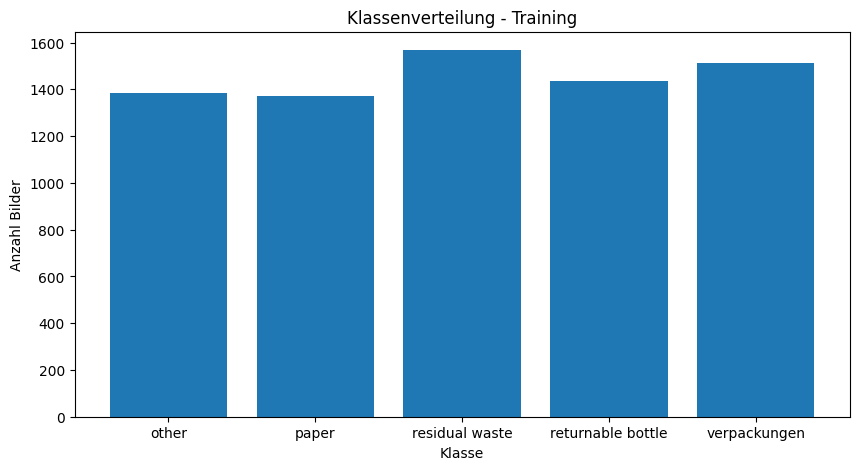

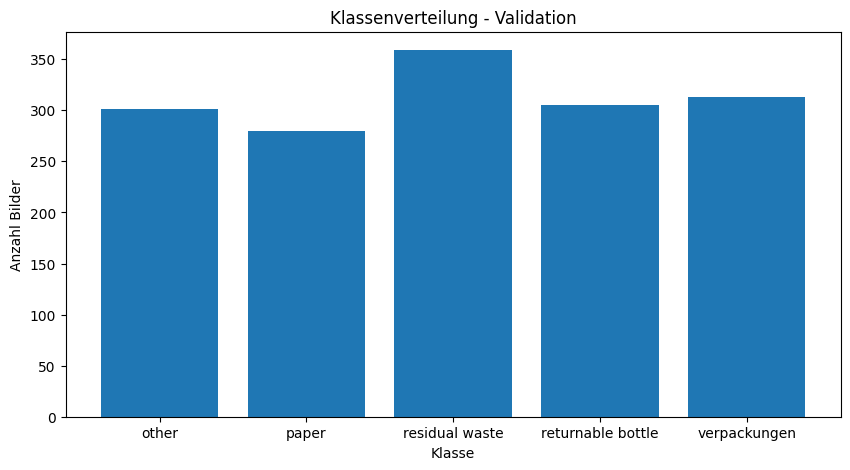

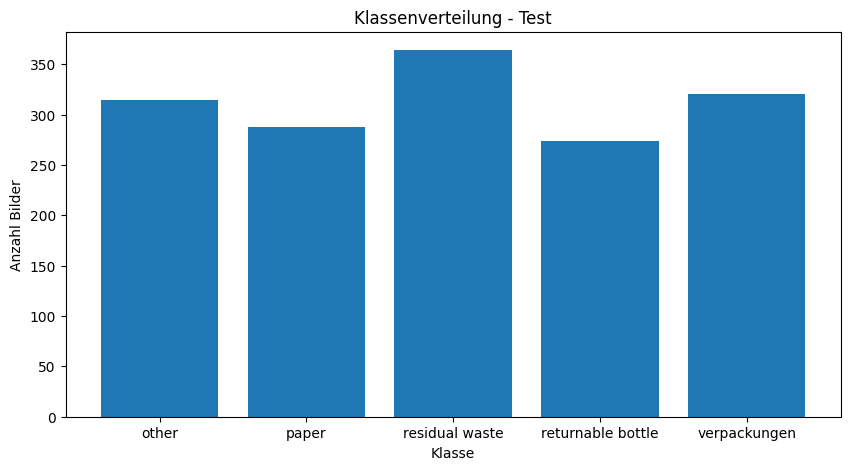

In [21]:
# --- Train ---
train_dist = count_classes_subset(train_loader.dataset, full_dataset.classes)
print_class_distribution(
    train_dist,
    title="Klassenverteilung - Training",
    xlabel="Klasse",
    ylabel="Anzahl Bilder"
)

# --- Validation ---
val_dist = count_classes_subset(val_loader.dataset, full_dataset.classes)
print_class_distribution(
    val_dist,
    title="Klassenverteilung - Validation",
    xlabel="Klasse",
    ylabel="Anzahl Bilder"
)

# --- Test ---
test_dist = count_classes_subset(test_loader.dataset, full_dataset.classes)
print_class_distribution(
    test_dist,
    title="Klassenverteilung - Test",
    xlabel="Klasse",
    ylabel="Anzahl Bilder"
)

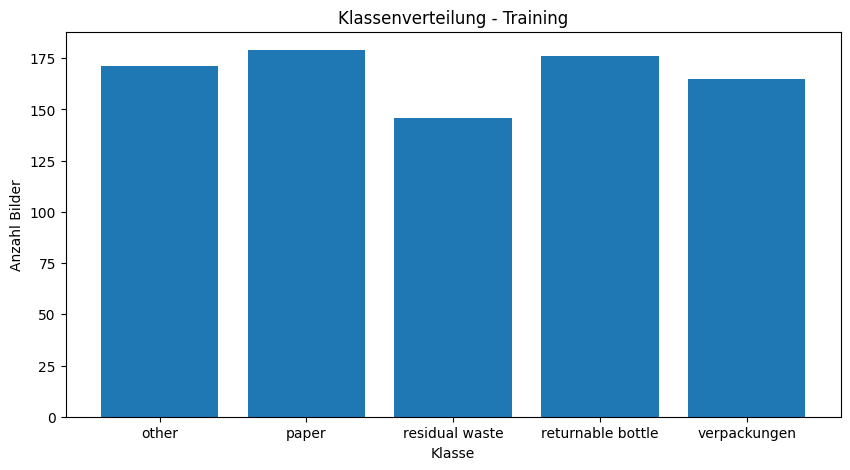

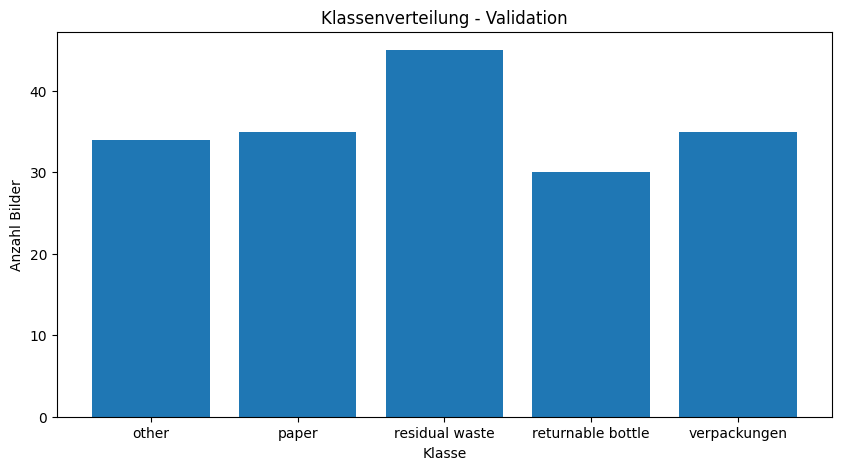

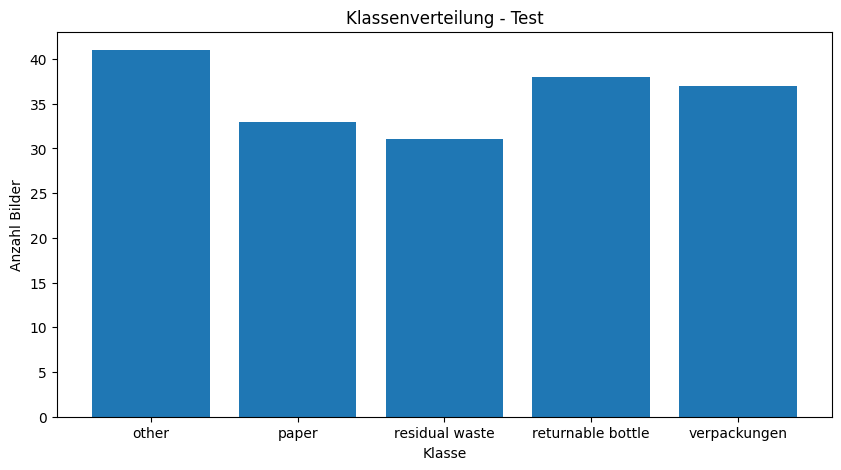

In [22]:
# --- Train ---
custom_train_dist = count_classes_subset(custom_train_loader.dataset, custom_full_dataset.classes)
print_class_distribution(
    custom_train_dist,
    title="Klassenverteilung - Training",
    xlabel="Klasse",
    ylabel="Anzahl Bilder"
)

# --- Validation ---
custom_val_dist = count_classes_subset(custom_val_loader.dataset, custom_full_dataset.classes)
print_class_distribution(
    custom_val_dist,
    title="Klassenverteilung - Validation",
    xlabel="Klasse",
    ylabel="Anzahl Bilder"
)

# --- Test ---
custom_test_dist = count_classes_subset(custom_test_loader.dataset, custom_full_dataset.classes)
print_class_distribution(
    custom_test_dist,
    title="Klassenverteilung - Test",
    xlabel="Klasse",
    ylabel="Anzahl Bilder"
)

In [ ]:
def show_random_samples(dataset): 
    figure = plt.figure(figsize=(10, 10))
    cols, rows = 6, 1
    class_names = dataset.classes  

    for i in range(1, rows * cols + 1):
        sample_idx = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[sample_idx]

        img = img.permute(1, 2, 0)
        class_name = class_names[int(label)]

        figure.add_subplot(rows, cols, i)
        plt.axis("off")
        plt.title(class_name)
        plt.imshow(img)

    plt.tight_layout()
    plt.show()

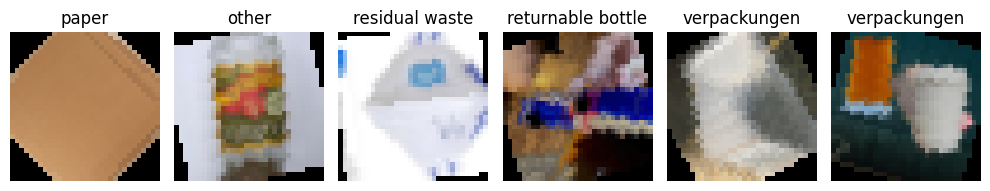

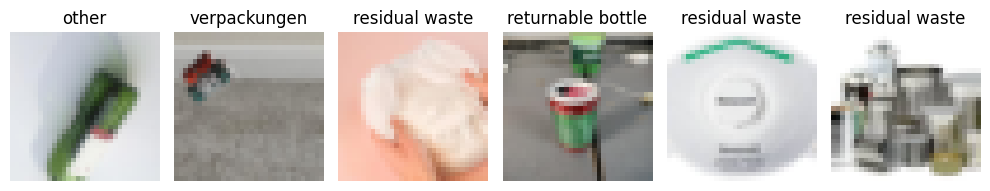

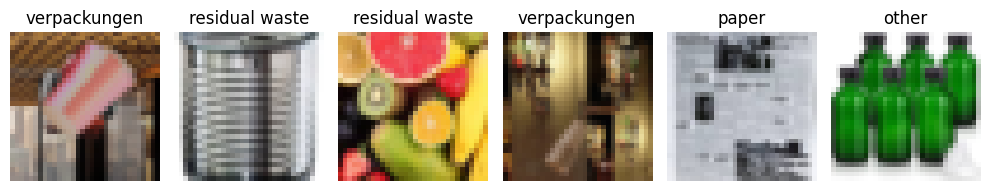

In [24]:
# --- Train ---
show_random_samples(train_loader.dataset)

# --- Validation ---
show_random_samples(val_loader.dataset)

# --- Test ---
show_random_samples(test_loader.dataset)


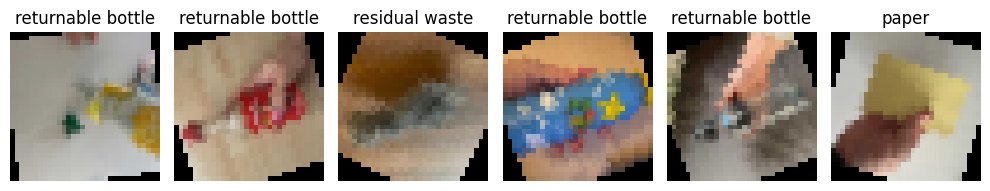

In [31]:
show_random_samples(custom_train_loader.dataset)

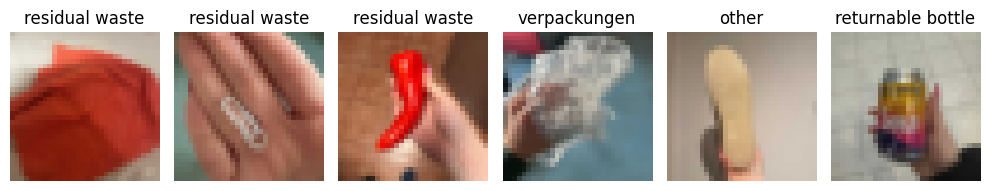

In [32]:
show_random_samples(custom_val_loader.dataset)

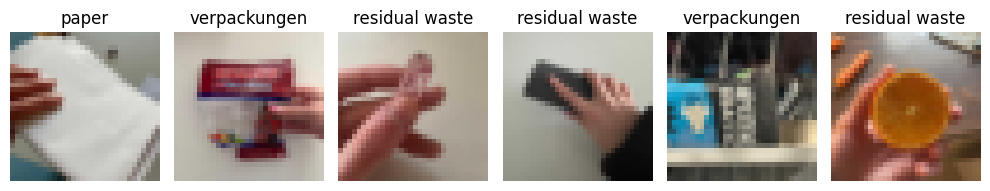

In [33]:
show_random_samples(custom_test_loader.dataset)

## Architekturen definieren 

1. MLP 
3. CNN - Eigenen Feature Extractor und Classifier 
4. Komplexes CNN 
2. Transfer Learning <br>
    2.1. From scratch <br>
    2.2. Pretrained<br>
    2.3. Fine Tune <br>

### Multi Layer Perceptron 

In [34]:
class MLP(nn.Module):
    def __init__(self, config):
        super(MLP, self).__init__()
        self.d1 = nn.Linear(channel * image_size * image_size, config.hidden_dim)
        self.dropout = nn.Dropout(p=config.dropout)
        self.d2 = nn.Linear(config.hidden_dim, class_count)
    
    def forward(self, x):
        x = x.flatten(start_dim = 1) #serialize 3dim input

        x = self.d1(x)
        x = torch.relu(x)
        x = self.dropout(x)

        raw_scores = self.d2(x)
        output_predictions = torch.softmax(raw_scores , dim=1)   

        return output_predictions 

#### CNN

In [35]:
class CNN(nn.Module):
    def __init__(self, config):
        super(CNN, self).__init__()
        self.drop=nn.Dropout2d(config.dropout)
        self.dropfc=nn.Dropout(config.dropout)
        self.conv1 = nn.Conv2d(channel, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(512*2*2, config.hidden_dim_1)
        self.fc2 = nn.Linear(config.hidden_dim_1, class_count)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.drop(self.conv1(x)))))
        x = self.pool(F.relu(self.bn2(self.drop(self.conv2(x)))))
        x = self.pool(F.relu(self.bn3(self.drop(self.conv3(x)))))
        x = self.pool(F.relu(self.bn4(self.drop(self.conv4(x)))))
        x = x.view(-1, 512*2*2)
        x = F.relu(self.dropfc(self.fc1(x)))
        x = self.fc2(x)
        return x

### Transfer Learning 

!!! Wir nutzen das VGG16 Model 

In [41]:
class VGG16(nn.Module):
    def __init__(self, config):
        super(VGG16, self).__init__()
        self.config = config
        
        if config.model_subtype == "TRAIN_FROM_SCRATCH":
            self.model = models.vgg16(pretrained=False)
            for param in self.model.parameters():
                param.requires_grad = True
        elif config.model_subtype == "TRAIN_PRETRAINED":
            self.model = models.vgg16(pretrained=True)
            for param in self.model.parameters():
                param.requires_grad = False
        elif config.model_subtype == "TRAIN_FINETUNE":
            self.model = models.vgg16(pretrained=True)
            for param in self.model.parameters():
                param.requires_grad = True
        else:
            raise ValueError(f"Unknown model_subtype {config.model_subtype}")
        
        self.model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1, 1))

        self.model.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, config.hidden_dim),
            nn.ReLU(),
            nn.Dropout(config.dropout),
            nn.Linear(config.hidden_dim, class_count)
        )

    def forward(self, x):
        return self.model(x)


In [42]:
def get_model(config):
    print(config)
    if config.model_type == "MLP":
        model = MLP(config) 
        optimizer = torch.optim.SGD(model.parameters(), lr=config.learning_rate)
        loss_fn = nn.CrossEntropyLoss()

    elif config.model_type == "CNN":
        model = CNN(config) 
        optimizer = torch.optim.SGD(model.parameters(), lr=config.learning_rate)
        loss_fn = nn.CrossEntropyLoss()

    elif config.model_type == "TRANSFER":
        model = VGG16(config);  
        optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate)
        loss_fn = nn.CrossEntropyLoss()

    else:
        raise ValueError(f"Unknown model_type {config.model_type}")
    
    model = model.to(device)
    summary(model, input_size=(channel, image_size, image_size))

    return model, optimizer, loss_fn

#### Trainings Funktionen

In [43]:
def get_accuracy(output, target, batch_size):
    prediction=torch.max(output, 1)[1].view(target.size())
    corrects = (prediction.data == target.data).sum()
    accuracy = 100.0 * corrects / batch_size
    return accuracy.item()

In [44]:
def train_step(model, config, optimizer, loss_fn, train_loader): 
    loss_value = 0.0
    accuracy_value = 0.0


    for i, (images, labels) in enumerate(train_loader):
        model.train()

        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_value += loss.detach().item()
        accuracy_value += get_accuracy(outputs, labels, config.batch_size)

    loss_avg = loss_value / i
    accuracy_avg = accuracy_value / i

    return loss_avg, accuracy_avg

        

In [45]:
def val_step(model, config, loss_fn, val_loader):
    loss_value = 0.0
    accuracy_value = 0.0

    with torch.no_grad():
        for i, (images, labels) in enumerate(val_loader):
            model.eval()

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = loss_fn(outputs, labels)

            loss_value += loss.detach().item()
            accuracy_value += get_accuracy(outputs, labels, config.batch_size)

    loss_avg = loss_value / i
    accuracy_avg = accuracy_value / i

    return loss_avg, accuracy_avg

In [46]:
def print_results(num_epochs, train_accuracy, val_accuracy, model, test_loader, full_dataset):

    # print training and validation accuracy plot
    plt.figure(figsize=(12,8))
    plt.plot(range(num_epochs),train_accuracy,"r",label="training accuracy")
    plt.plot(range(num_epochs),val_accuracy,"b",label="validation accuracy")
    plt.xlabel("epoch")
    plt.grid(True)
    plt.legend()
    plt.show()

    # evaluate on validation set
    y_true = []
    y_pred = []

    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # print classification report 
    print(classification_report(y_true, y_pred))

    # print confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
    plt.xlabel('Vorhergesagte Klasse (Prediction)')
    plt.ylabel('Wahre Klasse (True Label)')
    plt.title('Confusion Matrix: Was wird womit verwechselt?')
    plt.show()

In [49]:
def run_training_loop(name, model, config, optimizer, loss_fn, train_loader, val_loader, test_loader, full_dataset ):
    print(f"Start training for {name} with {config.epochs} epochs...") 

    model = model.to(device) 

    history = {
        'train_loss': [],
        'train_accuracy': [],
        'val_loss': [],
        'val_accuracy': []
    }

    for epoch in range(config.epochs):
        train_loss_avg, train_accuracy_avg = train_step(model, config, optimizer, loss_fn, train_loader)
        val_loss_avg, val_accuracy_avg = val_step(model, config, loss_fn, val_loader)

        history['train_loss'].append(train_loss_avg)
        history['train_accuracy'].append(train_accuracy_avg)
        history['val_loss'].append(val_loss_avg)
        history['val_accuracy'].append(val_accuracy_avg)

        print(f"Epoch [{epoch+1}/{config.epochs}], "
              f"Train Loss: {train_loss_avg:.4f}, Train Acc: {train_accuracy_avg:.2f}%, "
              f"Val Loss: {val_loss_avg:.4f}, Val Acc: {val_accuracy_avg:.2f}%")
        
        if USE_WANDB:
            wandb.log({
                "train_loss": train_loss_avg,
                "train_accuracy": train_accuracy_avg,
                "val_loss": val_loss_avg,
                "val_accuracy": val_accuracy_avg
            })
    
    print_results(config.epochs, history['train_accuracy'], history['val_accuracy'], model, test_loader, full_dataset)

In [ ]:
def model_pipeline(name, config):
    
    with wandb.init(project=WANDB_PROJECT, config=config):
        config = wandb.config

        model, optimizer, loss_fn = get_model(config)

        run_training_loop(name, model, config, optimizer, loss_fn, train_loader, val_loader, test_loader, full_dataset)

{'model_type': 'MLP', 'batch_size': 16, 'learning_rate': 0.1, 'epochs': 15, 'hidden_dim': 512, 'dropout': 0.2}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]       1,573,376
           Dropout-2                  [-1, 512]               0
            Linear-3                    [-1, 5]           2,565
Total params: 1,575,941
Trainable params: 1,575,941
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 6.01
Estimated Total Size (MB): 6.03
----------------------------------------------------------------
Start training for MLP with 15 epochs...
Epoch [1/15], Train Loss: 1.5742, Train Acc: 28.72%, Val Loss: 1.6032, Val Acc: 27.84%
Epoch [2/15], Train Loss: 1.5461, Train Acc: 33.34%, Val Loss: 1.5322, Val Acc: 36.08%
Epoch [3/15], Train Loss: 1.5309

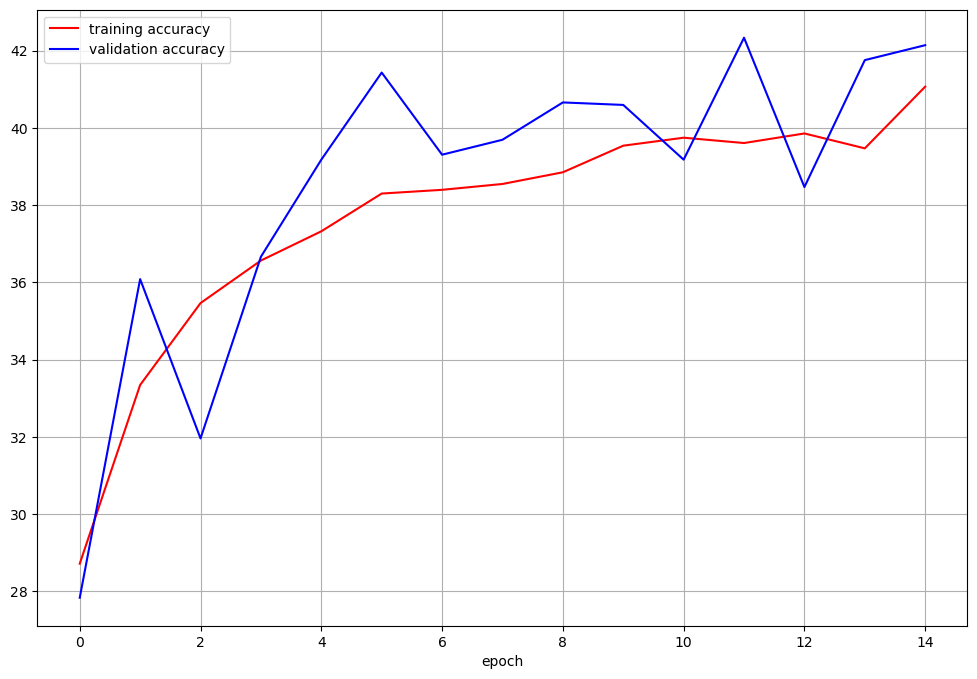

              precision    recall  f1-score   support

           0       0.52      0.46      0.49       314
           1       0.36      0.39      0.37       288
           2       0.58      0.19      0.29       364
           3       0.31      0.84      0.45       274
           4       0.68      0.20      0.31       320

    accuracy                           0.40      1560
   macro avg       0.49      0.42      0.38      1560
weighted avg       0.50      0.40      0.38      1560



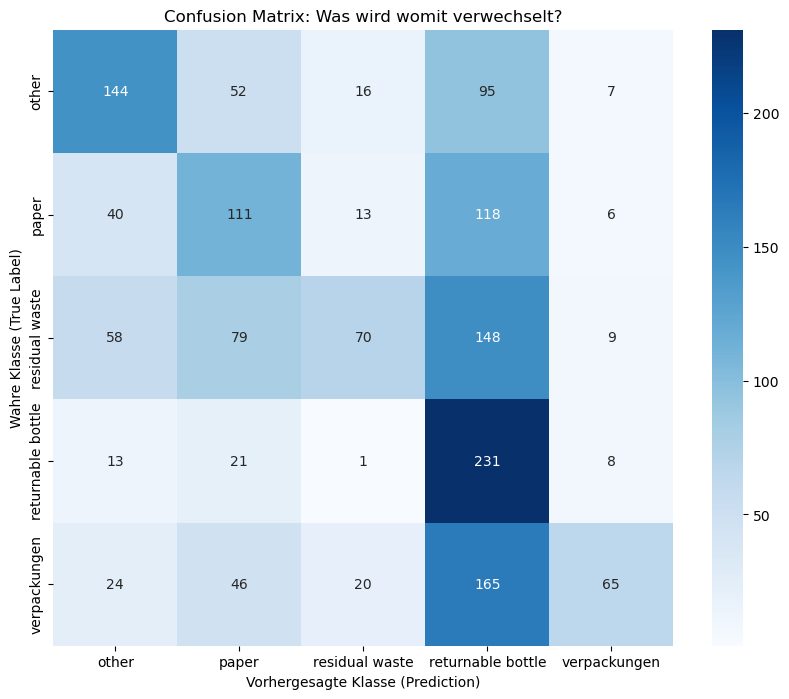

train_accuracy,▁▄▅▅▆▆▆▇▇▇▇▇▇▇█
train_loss,█▆▅▄▃▃▃▃▃▂▂▂▂▂▁
val_accuracy,▁▅▃▅▆█▇▇▇▇▆█▆██
val_loss,█▄▇▅▂▂▃▃▂▂▃▁▄▂▂
train_accuracy,41.06553
train_loss,1.48589
val_accuracy,42.13918
val_loss,1.49047


In [34]:
model_pipeline("MLP", config_mlp)

{'model_type': 'CNN', 'batch_size': 16, 'learning_rate': 0.01, 'epochs': 30, 'hidden_dim_1': 1024, 'dropout': 0.2}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
         Dropout2d-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5          [-1, 128, 16, 16]          73,856
         Dropout2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
         MaxPool2d-8            [-1, 128, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         295,168
        Dropout2d-10            [-1, 256, 8, 8]               0
      BatchNorm2d-11            [-1, 256, 8, 8]             512
        MaxPool2d-12            [-1, 256, 4, 4]     

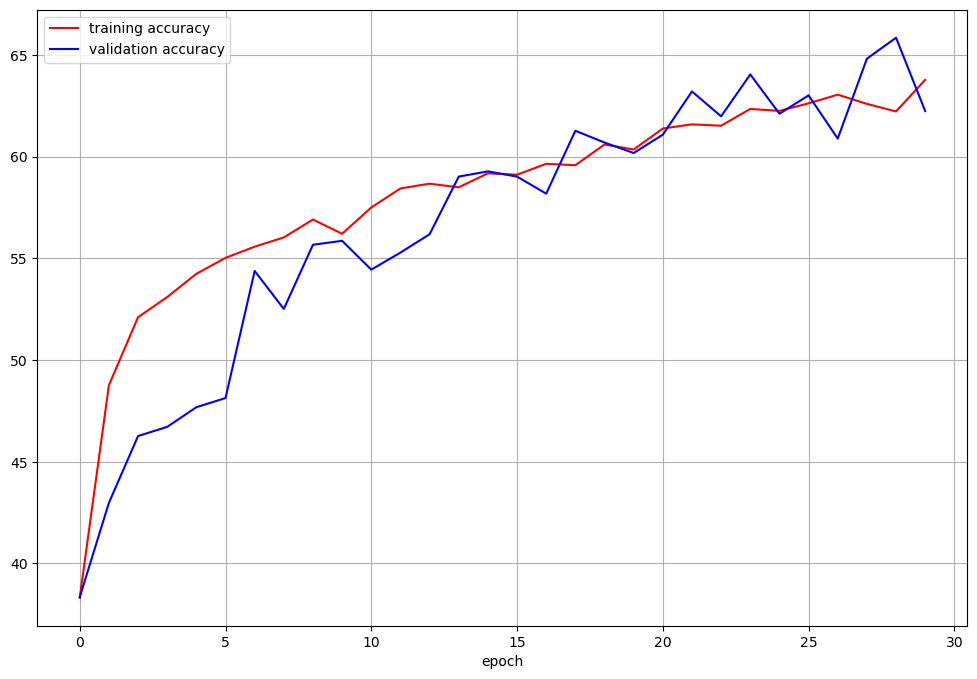

              precision    recall  f1-score   support

           0       0.75      0.45      0.56       314
           1       0.62      0.58      0.60       288
           2       0.65      0.70      0.67       364
           3       0.56      0.85      0.67       274
           4       0.62      0.57      0.60       320

    accuracy                           0.63      1560
   macro avg       0.64      0.63      0.62      1560
weighted avg       0.64      0.63      0.62      1560



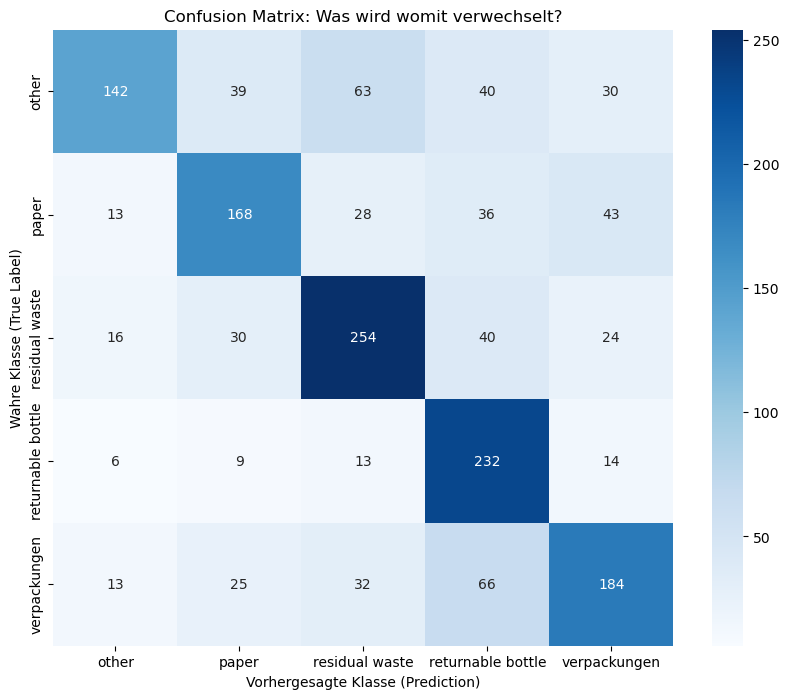

train_accuracy,▁▄▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇███████
train_loss,█▆▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
val_accuracy,▁▂▃▃▃▃▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇█▇▇▇██▇
val_loss,▇█▆▆▆▆▄▅▄▄▄▄▄▃▃▃▃▃▂▃▂▂▂▂▂▂▂▁▁▂
train_accuracy,63.78029
train_loss,0.9593
val_accuracy,62.24227
val_loss,1.02543


In [40]:
model_pipeline("CNN", config_cnn)

In [43]:
model_pipeline("Transfer Learning - From Scratch", config_transfer["scratch"])

{'model_type': 'TRANSFER', 'model_subtype': 'TRAIN_FROM_SCRATCH', 'batch_size': 16, 'learning_rate': 0.0001, 'epochs': 30, 'hidden_dim': 128, 'dropout': 0.2}


c:\Users\Windows 11 Pro\anaconda3\envs\torch-gpu\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Windows 11 Pro\anaconda3\envs\torch-gpu\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

Traceback (most recent call last):
  File "C:\Users\Windows 11 Pro\AppData\Local\Temp\ipykernel_4620\2454457757.py", line 8, in model_pipeline
    run_training_loop(name, model, config, optimizer, loss_fn)
  File "C:\Users\Windows 11 Pro\AppData\Local\Temp\ipykernel_4620\3256118580.py", line 15, in run_training_loop
    val_loss_avg, val_accuracy_avg = val_step(model, config, loss_fn)
                                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Windows 11 Pro\AppData\Local\Temp\ipykernel_4620\329874729.py", line 6, in val_step
    for i, (images, labels) in enumerate(val_loader):
                               ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Windows 11 Pro\anaconda3\envs\torch-gpu\Lib\site-packages\torch\utils\data\dataloader.py", line 494, in __iter__
    return self._get_iterator()
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Windows 11 Pro\anaconda3\envs\torch-gpu\Lib\site-packages\torch\utils\data\dataloader.py", line 427, in _get_iterator
    r

train_accuracy,▁▁▁▁▁▁▂▃▄▃▅▇▇▇█
train_loss,█▇▆▆▅▅▄▄▄▃▃▂▂▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▂█▄▆▅▆
val_loss,█▇▇▆▆▅▅▄▄▃▃▂▂▁▁
train_accuracy,21.9163
train_loss,1.61203
val_accuracy,23.13144
val_loss,1.62457


KeyboardInterrupt: 

In [ ]:
model_pipeline("Transfer Learning - Pretrained", config_transfer["pretrained"])

In [ ]:

model_pipeline("Transfer Learning - Finetune", config_transfer["finetune"])

In [52]:
def custom_model_pipeline(name, config):
    
    with wandb.init(project=WANDB_PROJECT, config=config):
        config = wandb.config

        model, optimizer, loss_fn = get_model(config)

        run_training_loop(name, model, config, optimizer, loss_fn, custom_train_loader, custom_val_loader, custom_test_loader, custom_full_dataset)

{'model_type': 'TRANSFER', 'model_subtype': 'TRAIN_FINETUNE', 'batch_size': 16, 'learning_rate': 0.0001, 'epochs': 30, 'hidden_dim': 128, 'dropout': 0.2}


/home/jstarkov/anaconda3/envs/sltai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jstarkov/anaconda3/envs/sltai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

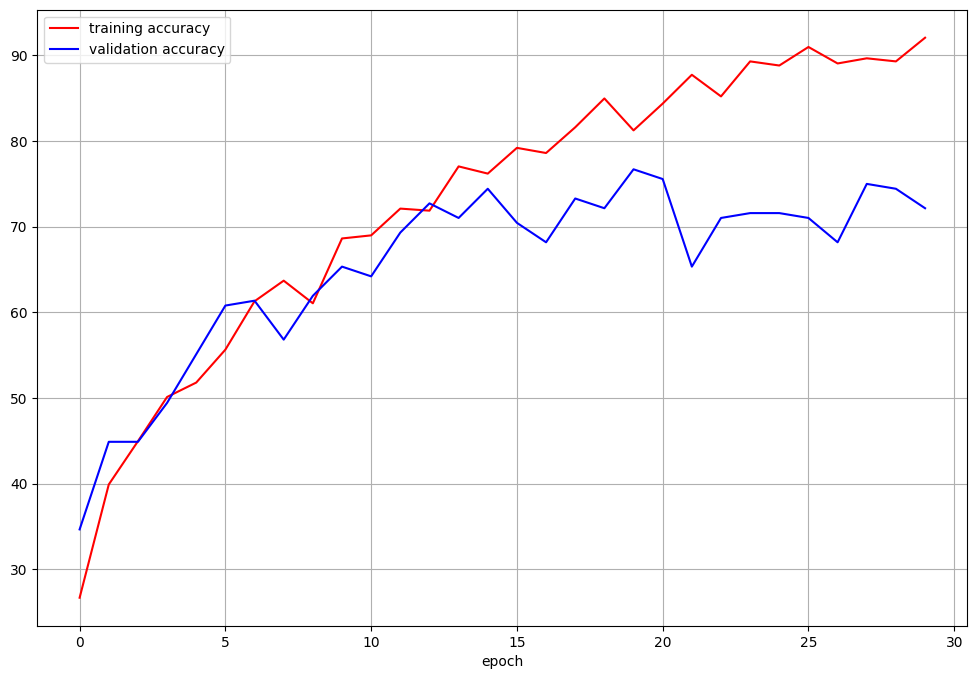

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        41
           1       0.88      0.70      0.78        33
           2       0.60      0.87      0.71        31
           3       0.72      0.95      0.82        38
           4       0.79      0.51      0.62        37

    accuracy                           0.73       180
   macro avg       0.75      0.74      0.73       180
weighted avg       0.76      0.73      0.73       180



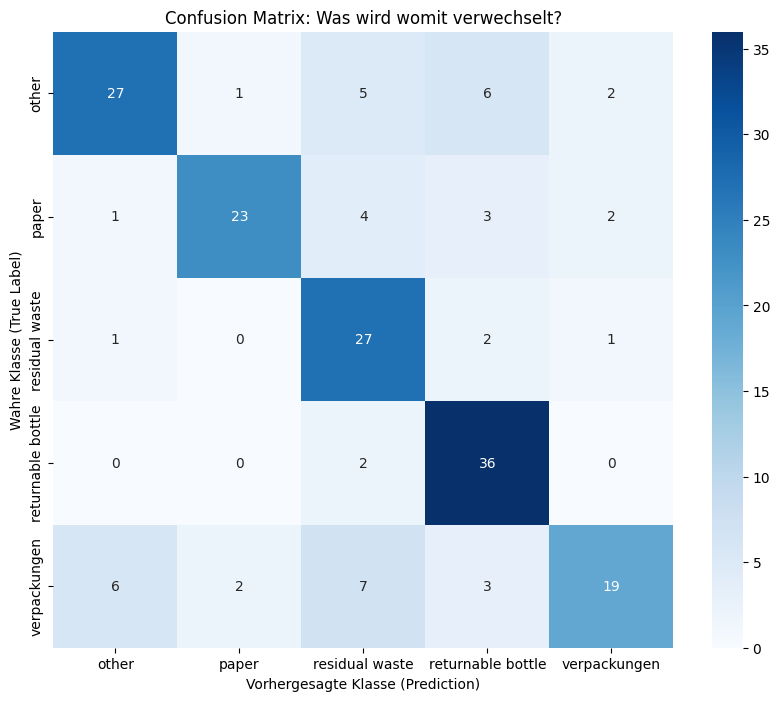

train_accuracy,▁▂▃▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇█▇███████
train_loss,█▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁
val_accuracy,▁▃▃▃▄▅▅▅▆▆▆▇▇▇█▇▇▇▇██▆▇▇▇▇▇██▇
val_loss,█▇▇▆▅▄▄▅▃▄▂▂▁▂▁▃▅▁▄▂▁▇▅▂▄▄▅▅▂▆
train_accuracy,92.06731
train_loss,0.25843
val_accuracy,72.15909
val_loss,1.37113


In [55]:
custom_model_pipeline("Custom Transfer Learning - Finetune", config_transfer["finetune"])

### Hyperparameteroptimisation 

Sweep Konfigurationen (Hyperparameter Search-Space):

In [ ]:
parameters_mlp = { 
    'model_type': {
        'value': 'MLP'},
    'epochs': {
        'value': 15}, 
    'batch_size': {
        'values': [16,64]},
    'learning_rate': {
        'values': [0.005,0.01]},  
    'hidden_dim': {
        'values': [32,64]}, 
    'dropout': {
        'values': [0.0,0.3]}
    }

In [ ]:
sweep_config = {
    "method" : "random",
    "parameters" : parameters_mlp
} 

In [ ]:
sweep_id=wandb.sweep(sweep_config,project=WANDB_PROJECT)

In [ ]:
wandb.agent(sweep_id, model_pipeline("MLP", sweep_config), count=10)

In [ ]:
wandb.teardown()

### Quellen <a id="quellen"></a>

[1] ALBA und Civey, "Gut gemeint: Große Mehrheit trennt den Müll und schadet dennoch dem Klima", Pressemitteilung, 20.07.2022. (Online). Verfügbar: https://www.alba.info/unternehmen/newsroom/pressemitteilungen/detail/gut-gemeint-grosse-mehrheit-trennt-den-muell-und-schadet-dennoch-dem-klima/. (Zugriff: 10.01.2026).

[2] L. Löwe, "Alles durcheinander: Die Unlust beim Mülltrennen", FR.de, 10.01.2019. (Online). Verfügbar: https://www.fr.de/ratgeber/wohnen/alles-durcheinander-unlust-beim-muelltrennen-11106084.html. (Zugriff: 15.01.2026). 